In [1]:
import os
import pretty_midi
import numpy as np
import os
import pretty_midi
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Path to the directory containing MIDI files
base_dir = './Composer_Dataset/NN_midi_files_extended/train'


# List of folders (composers) within the base directory
composer_folders = os.listdir(base_dir)

# Initialize a list to store all loaded MIDI data
all_midi_data = []

# Loop through each composer folder
for composer_folder in composer_folders:
    composer_path = os.path.join(base_dir, composer_folder)
    
    # Check if the item in the base directory is a folder
    if os.path.isdir(composer_path):
        print(f"Loading MIDI files from {composer_folder}...")
        
        # Loop through each MIDI file in the composer folder
        for file_name in os.listdir(composer_path):
            file_path = os.path.join(composer_path, file_name)
            
            # Check if the item in the composer folder is a file and has a .mid or .midi extension
            if os.path.isfile(file_path) and (file_name.endswith('.mid')):
                midi_data = pretty_midi.PrettyMIDI(file_path)
                all_midi_data.append({
                    'composer': composer_folder,
                    'file_name': file_name,
                    'midi_data': midi_data
                })
                print(f"  Loaded: {file_name}")

print("All MIDI files loaded successfully!")

Loading MIDI files from bach...
  Loaded: bach342.mid
  Loaded: bach343.mid
  Loaded: bach345.mid
  Loaded: bach346.mid
  Loaded: bach347.mid
  Loaded: bach350.mid
  Loaded: bach351.mid
  Loaded: bach352.mid
  Loaded: bach353.mid
  Loaded: bach355.mid
  Loaded: bach357.mid
  Loaded: bach358.mid
  Loaded: bach360.mid
  Loaded: bach361.mid
  Loaded: bach362.mid
  Loaded: bach363.mid
  Loaded: bach364.mid
  Loaded: bach365.mid
  Loaded: bach366.mid
  Loaded: bach367.mid
  Loaded: bach368.mid
  Loaded: bach369.mid
  Loaded: bach370.mid
  Loaded: bach371.mid
  Loaded: bach372.mid
  Loaded: bach373.mid
  Loaded: bach374.mid
  Loaded: bach375.mid
  Loaded: bach377.mid
  Loaded: bach378.mid
  Loaded: bach379.mid
  Loaded: bach380.mid
  Loaded: bach381.mid
  Loaded: bach382.mid
  Loaded: bach383.mid
  Loaded: bach385.mid
  Loaded: bach386.mid
  Loaded: bach387.mid
  Loaded: bach388.mid
  Loaded: bach389.mid
  Loaded: bach390.mid
  Loaded: bach391.mid
Loading MIDI files from bartok...
  Loaded: 

C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


  Loaded: chopin054.mid
  Loaded: chopin055.mid
  Loaded: chopin056.mid
  Loaded: chopin057.mid
  Loaded: chopin058.mid
  Loaded: chopin059.mid
  Loaded: chopin060.mid
  Loaded: chopin063.mid
  Loaded: chopin064.mid
  Loaded: chopin065.mid
  Loaded: chopin067.mid
  Loaded: chopin068.mid
  Loaded: chopin071.mid
  Loaded: chopin072.mid
  Loaded: chopin073.mid
  Loaded: chopin074.mid
  Loaded: chopin075.mid
  Loaded: chopin076.mid
  Loaded: chopin077.mid
  Loaded: chopin079.mid
  Loaded: chopin080.mid
  Loaded: chopin081.mid
  Loaded: chopin082.mid
  Loaded: chopin083.mid
  Loaded: chopin084.mid
  Loaded: chopin085.mid
  Loaded: chopin088.mid
  Loaded: chopin089.mid
  Loaded: chopin090.mid
  Loaded: chopin091.mid
  Loaded: chopin092.mid
  Loaded: chopin093.mid
  Loaded: chopin094.mid
  Loaded: chopin095.mid
  Loaded: chopin096.mid
  Loaded: chopin097.mid
  Loaded: chopin098.mid
Loading MIDI files from handel...
  Loaded: handel099.mid
  Loaded: handel100.mid
  Loaded: handel101.mid
  Load

# Feature Engineering

In [3]:

# Initialize lists to store extracted features
num_instruments_list = []
instruments_list_list = []
num_programs_list = []
tempo_list = []
composer_list = []
resolution_list = []
time_signature_ratio_list = []
duration_list = []
average_pitch_list = []
# Loop through all loaded MIDI data
for data in all_midi_data:
    midi_data = data['midi_data']
    
    # Extract the number of instruments
    num_instruments = len(midi_data.instruments)
    num_instruments_list.append(num_instruments)
    
    # Extract the list of instruments
    instruments_list = [instrument.program for instrument in midi_data.instruments]
    # flatten the list
    instruments_list_list.append(instruments_list)
    
    # Extract the number of programs
    num_programs = len(set(instruments_list))
    num_programs_list.append(num_programs)
    
    # Extract the tempo
    tempo = midi_data.estimate_tempo()
    tempo_list.append(tempo)
    
    # Extract the composer name
    composer = data['composer']
    composer_list.append(composer)

    # resolution
    resolution = midi_data.resolution
    resolution_list.append(resolution)

    #time_signature_ratio- Take numerator and denominator of time signature and divide them
    if len(midi_data.time_signature_changes) <=0:
        time_signature_ratio = 0
        time_signature_ratio_list.append(time_signature_ratio)
    else:
        time_sig_numerator =  midi_data.time_signature_changes[0].numerator
        time_sig_denominator = midi_data.time_signature_changes[0].denominator
        time_signature_ratio = time_sig_numerator/time_sig_denominator
        time_signature_ratio_list.append(time_signature_ratio)

    # duration
    duration = midi_data.get_end_time()
    duration_list.append(duration)

    # average_pitch
    pitch_list = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            pitch_list.append(note.pitch)
    average_pitch = np.mean(pitch_list)
    average_pitch_list.append(average_pitch)


# # Create a DataFrame to store the extracted features
import pandas as pd
df = pd.DataFrame({
    'composer': composer_list,
    'num_instruments': num_instruments_list,
    'instruments_list': instruments_list_list,
    'num_programs': num_programs_list,
    'tempo': tempo_list,
    'resolution': resolution_list,
    'time_signature_ratio': time_signature_ratio_list,
    'duration': duration_list,
    'average_pitch': average_pitch_list
})

# Display the first few rows of the DataFrame
df.head()

,composer,num_instruments,instruments_list,num_programs,tempo,resolution,time_signature_ratio,duration,average_pitch
0,bach,12,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]",1,248.235754,384,1.0,914.875000,63.972681
1,bach,12,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]",1,233.938023,384,0.0,445.690104,67.986739
2,bach,12,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]",1,266.035285,384,1.0,89.213542,64.177885
3,bach,12,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]",1,230.553293,384,1.0,103.048177,64.491651
4,bach,12,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]",1,175.318569,384,1.0,91.907552,62.205387


# Data Exploration

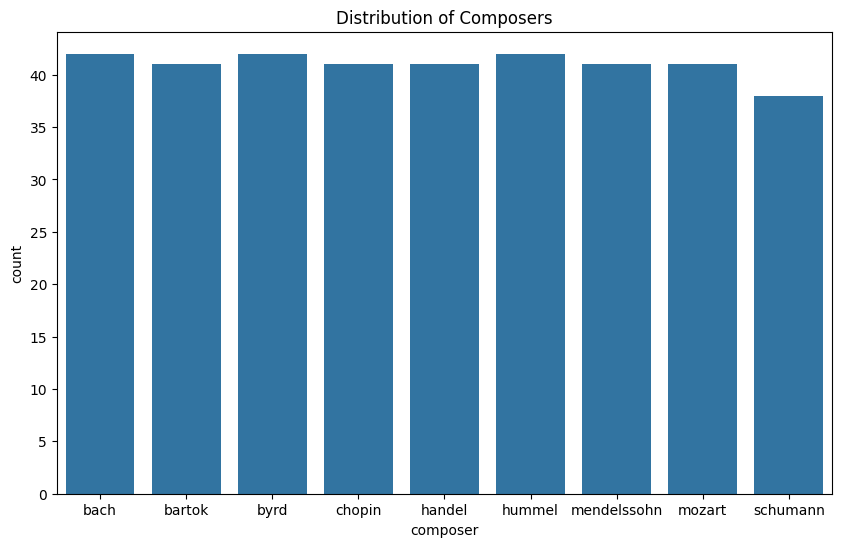

In [4]:
# Display the number of unique composers
df['composer'].value_counts()

# Display the distribution of composers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='composer')
plt.title('Distribution of Composers')
plt.show()


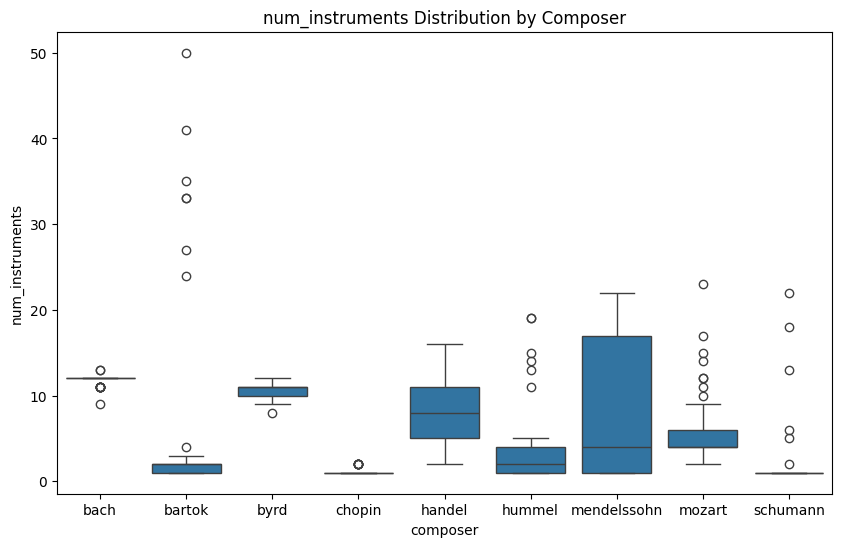

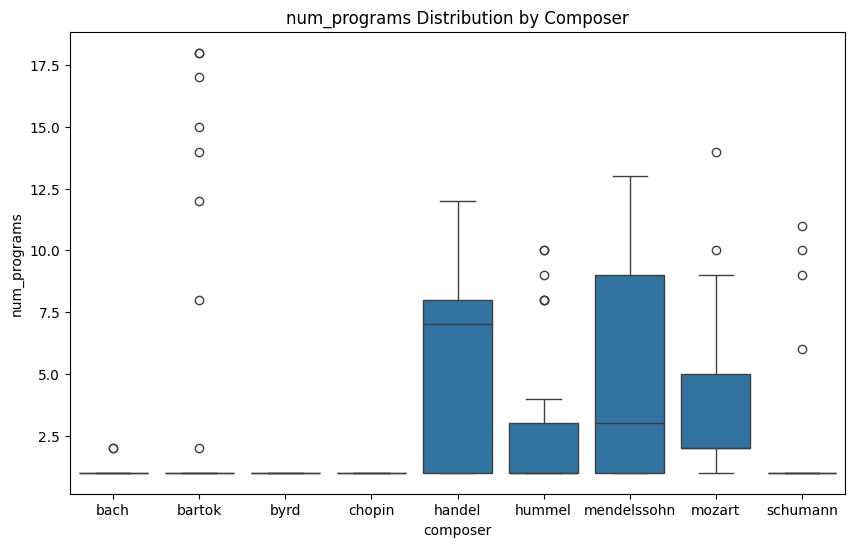

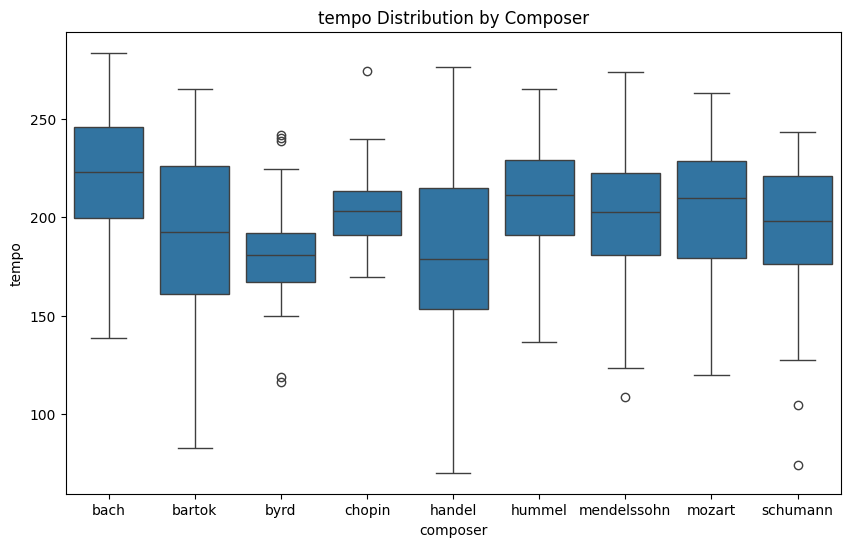

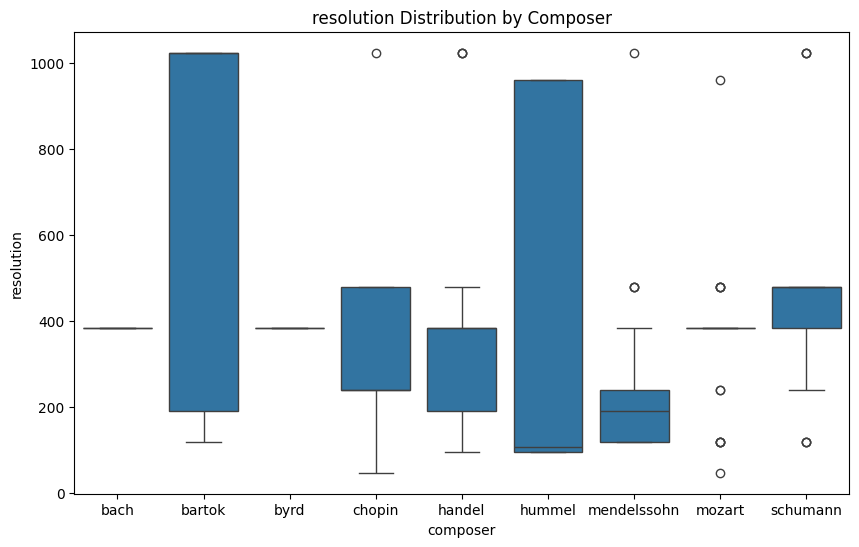

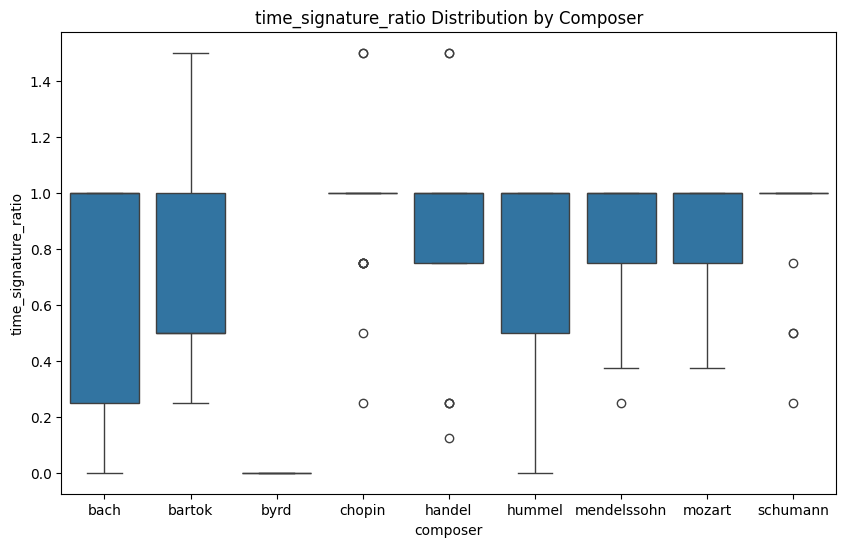

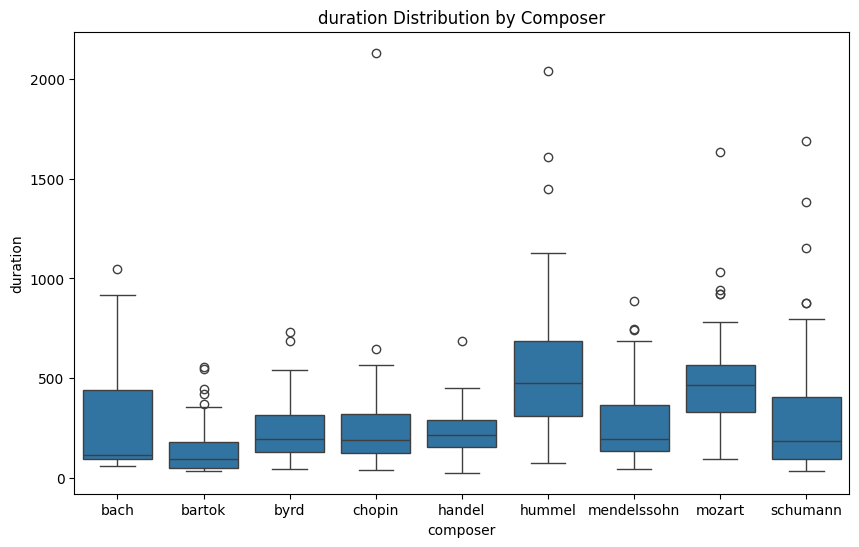

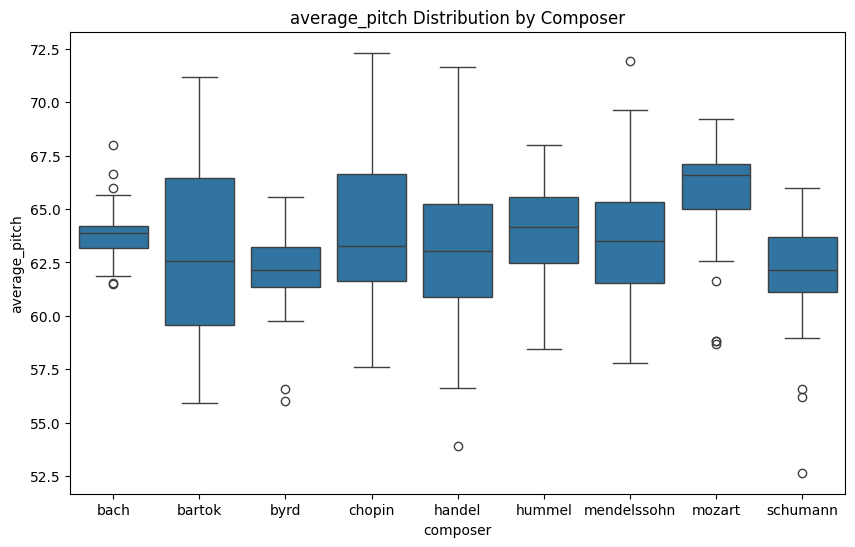

In [5]:
# Create a list of features to plot
features = ['num_instruments', 'num_programs', 'tempo', 'resolution', 'time_signature_ratio', 'duration', 'average_pitch']

# Loop through each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='composer', y=feature)
    plt.title(f'{feature} Distribution by Composer')
    plt.show()

# Preprocessing

In [8]:
# Normalize the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Display the first few rows of the normalized DataFrame
df_scaled.head()


label_encoder = LabelEncoder()
df_scaled['composer_encoded'] = label_encoder.fit_transform(df_scaled['composer'])

# Define the input features (X) and the target (y)
X = df_scaled[features].values
y = df_scaled['composer_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input features
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Model

In [9]:
# Define a function to create the LSTM model
def create_lstm_model(units, dropout_rate, input_shape):
    model = Sequential([
        LSTM(units, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units // 2, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units // 4),
        Dropout(dropout_rate),
        Dense(units // 8, activation='relu'),
        Dense(units // 16, activation='relu'),
        Dense(units // 32, activation='relu'),
        Dense(11, activation='softmax')
    ])
    return model

# Define the hyperparameters to tune
units = [2048]

# Define the dropout rates to tune
dropout_rates = [ 0.2]

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Initialize a list to store the results
results = []

# Loop through each combination of hyperparameters
for unit in units:
    for dropout_rate in dropout_rates:
        # Create the LSTM model
        model = create_lstm_model(unit, dropout_rate, input_shape)
        
        # Compile the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        
        # Evaluate the model
        accuracy = model.evaluate(X_train, y_train, verbose=0)
        accuracy_percentage = accuracy[1] * 100
        
        # Store the results
        results.append({
            'units': unit,
            'dropout_rate': dropout_rate,
            'accuracy': accuracy_percentage
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df



C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,units,dropout_rate,accuracy
0,2048,0.2,82.711864


# Classification Report

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


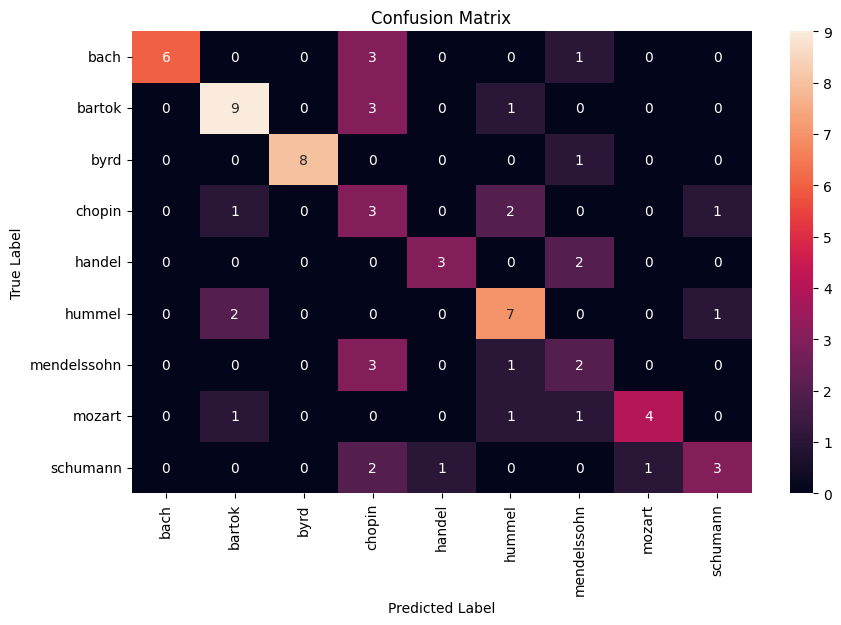

              precision    recall  f1-score   support

        bach       1.00      0.60      0.75        10
      bartok       0.69      0.69      0.69        13
        byrd       1.00      0.89      0.94         9
      chopin       0.21      0.43      0.29         7
      handel       0.75      0.60      0.67         5
      hummel       0.58      0.70      0.64        10
 mendelssohn       0.29      0.33      0.31         6
      mozart       0.80      0.57      0.67         7
    schumann       0.60      0.43      0.50         7

    accuracy                           0.61        74
   macro avg       0.66      0.58      0.61        74
weighted avg       0.68      0.61      0.63        74



In [10]:
# predict the test data
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y_pred = model.predict(X_test)

# Convert the predicted values to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

